# 5주차 실습문제 - 데이터의 결합 및 상관관계 분석

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

***

In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

## 데이터의 결합

In [2]:
hn18 = pd.read_csv('health2018.csv')
hn18

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


In [3]:
hn18_add = pd.read_csv('hn18_add.csv')
hn18_add

,ID,sex,age,cholesterol,BP_systole,BP_diastole
0,A901020501,M,80,111,150,84
1,A901021301,M,78,224,132,77
2,A901021302,F,75,165,156,73
3,A901022601,F,43,197,102,70
4,A901023303,F,80,160,149,81
...,...,...,...,...,...,...
5963,R904028502,F,35,185,93,63
5964,R904028503,F,66,180,98,63
5965,R904028902,F,73,160,136,82
5966,R904029201,M,43,216,122,99


## 1. 데이터의 결합과 검사
### 1-1. 내부결합을 이용해 두 데이터 hn18과 hn18_add를 결합해 hdat 변수에 저장하고 .describe() 메소드를 이용해 요약값을 출력하라.

In [7]:
hdat = pd.merge(hn18, hn18_add, how =  'inner')
hdat

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,cholesterol,BP_systole,BP_diastole
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,111,150,84
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,224,132,77
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,165,156,73
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,197,102,70
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,160,149,81
...,...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,185,93,63
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,180,98,63
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,160,136,82
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,216,122,99


In [8]:
hdat.describe()

,age,height,weight,waist,BMI,Blood_glucose,cholesterol,BP_systole,BP_diastole
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,51.339645,163.471498,64.316354,82.288003,23.962628,101.275972,191.203251,118.811997,75.618130
std,16.688646,9.432172,12.559136,10.207824,3.523740,22.919817,37.585544,16.773629,10.292461
min,19.000000,132.500000,32.200000,56.800000,14.661224,51.000000,68.000000,76.000000,35.000000
25%,38.000000,156.600000,55.200000,74.900000,21.521822,89.000000,165.000000,106.000000,69.000000
50%,52.000000,163.000000,62.700000,82.200000,23.639372,96.000000,190.000000,116.000000,75.000000
75%,64.000000,170.400000,72.000000,89.200000,26.001326,104.250000,215.000000,129.000000,82.000000
max,80.000000,195.000000,144.200000,130.300000,43.918639,338.000000,457.000000,205.000000,139.000000


### 1-2. hdat 데이터프레임 객체에서 중복값이 있는지 검사하라.
중복된 행의 총 갯수를 세려면 어떻게 해야할까? (중복된 행의 갯수를 세지 못할 경우, 50% 감점)

In [13]:
a = hdat.duplicated()
a

0       False
1       False
2       False
3       False
4       False
        ...  
5963    False
5964    False
5965    False
5966    False
5967    False
Length: 5968, dtype: bool

In [20]:
count = 0
for i in a :
    if i == 'True':
        count+=1
ans = 5968 - count
print(ans)

5968


## 2. 상관관계 분석
### 2-1. 수축기 혈압(BP_systole)과 다른 수치 간의 선형 상관관계(Pearson correlation, R)를 계산하라.
가장 상관관계가 높은 변수는 무엇인가? 두번째로 상관관계가 높은 변수는 무엇인가?

In [24]:
hdat.corrwith(hdat.BP_systole, method = 'pearson') 
#가장 높은것 BP_diastole #두번째로 높은 것 age

age              0.415583
height          -0.114650
weight           0.128119
waist            0.327542
BMI              0.257535
Blood_glucose    0.222923
cholesterol      0.057081
BP_systole       1.000000
BP_diastole      0.592261
dtype: float64

### 2-2. 수축기 혈압(BP_systole)과 다른 수치 간의 상관관계를 Spearman correlation으로 구해보시오.
Pearson correlation으로 구한 값보다 0.1 이상 늘어난 항목이 있는가?

In [25]:
hdat.corrwith(hdat.BP_systole, method = 'spearman') 
#Blood_glucose 가 0.1 이상 늘어남 

age              0.430231
height          -0.079001
weight           0.168852
waist            0.368112
BMI              0.297026
Blood_glucose    0.336162
cholesterol      0.053325
BP_systole       1.000000
BP_diastole      0.603814
dtype: float64

### 2-3. 수축기 혈압(BP_systole)과 혈당(Blood_glucose)의 상관관계를 regplot을 이용해 그리시오.
x축은 BP_systole, y축은 Blood_glucose로 그릴 것.

<AxesSubplot:xlabel='BP_systole', ylabel='Blood_glucose'>

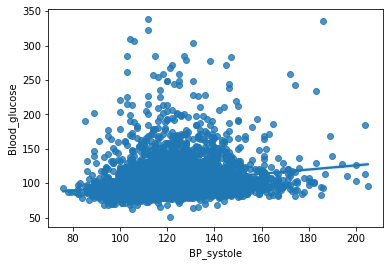

In [29]:
sns.regplot(data = hdat, x = 'BP_systole', y = 'Blood_glucose',)

### 2-4. 위 그래프의 가시성을 아래와 같이 고쳐보시오.
x축의 범위를 80-200, y축의 범위를 70-200으로 맞추고, 각 점의 크기(marker size)를 1로 줄여보시오. (부분점수 50%)

아래 그래프가 추세선과 완전히 잘 들어맞는가? 

(80.0, 200.0, 70.0, 200.0)

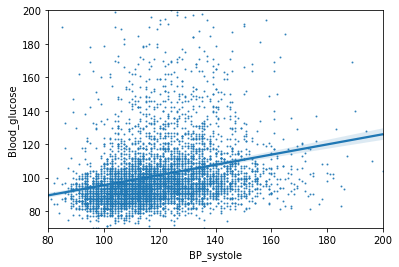

In [30]:
sns.regplot(data = hdat, x = 'BP_systole', y = 'Blood_glucose', scatter_kws = {'s':1})
plt.axis([80, 200, 70, 200])

In [32]:
np.corrcoef(hdat.BP_systole, hdat.Blood_glucose) # 0.223정도의 연관성이 있는데 그렇게 높은 상관관계가 있지는 않다 

array([[1.   , 0.223],
       [0.223, 1.   ]])

## 3. relplot을 이용한 데이터 시각화
### 3-1. 여성에서 수축기 혈압(BP_systole)과 가장 상관관계가 높은 변수 3가지를 찾으시오.
BP_diastole(이완기 혈압)을 제외하면 무엇과 무엇이 남는가?

In [35]:
hdat[hdat.sex=="F"].corrwith(hdat.BP_systole, method = 'spearman') # age, waist, Blood_glucose 가 다음으로 상관관계가 높다 

age              0.544697
height          -0.345254
weight           0.120416
waist            0.400321
BMI              0.324454
Blood_glucose    0.370180
cholesterol      0.062833
BP_systole       1.000000
BP_diastole      0.629331
dtype: float64

### 3-2. sns.relplot을 이용하여 x축은 나이, y축은 허리둘레(waist)를 놓고 여성만의 데이터 분포를 그리시오. 이때 각 점의 색깔은 수축기 혈압(BP_systole), 각 점의 크기는 BMI가 되도록 그려보시오.
(힌트: https://seaborn.pydata.org/tutorial/relational.html)

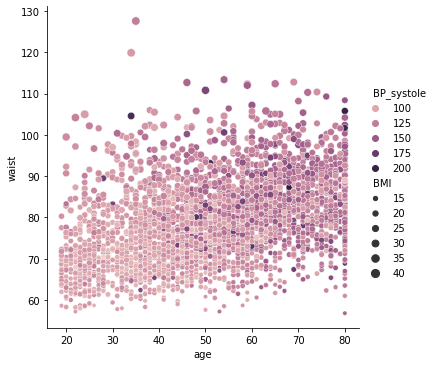

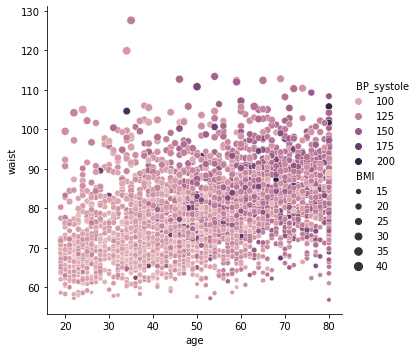

In [37]:
sns.relplot(data = hdat[hdat.sex == 'F'], x = 'age', y = 'waist', hue = 'BP_systole', size = 'BMI')